Lambda School Data Science

*Unit 4, Sprint 2, Module 3*

---

# Neural Network Frameworks (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Learn How to Select Model Architecture 
* <a href="#p2">Part 2</a>: Discuss the trade-off between various activation functions
* <a href="#p3">Part 3</a>: Regularization Strategies

## Lets Use Libraries!

The objective of the last two days has been to familiarize you with the fundamentals of neural networks: terminology, structure of networks, forward propagation, error/cost functions, backpropagation, epochs, and gradient descent. We have tried to reinforce these topics by requiring to you code some of the simplest neural networks by hand including Perceptrons (single node neural networks) and Multi-Layer Perceptrons also known as Feed-Forward Neural Networks. Continuing to do things by hand would not be the best use of our limited time. You're ready to graduate from doing things by hand and start using some powerful libraries to build cutting-edge predictive models. 

# Choosing Architecture (Learn)

## Overview

Choosing an architecture for a neural network is almost more an art than a science. The best way to choose an architecture is through research and experimentation. 

Let's do a few experiments, and track our results using a tool called TensorBoard which is a way to interactively visualize the results of our various experiences. Here is our previous model with TensorBoard incorporated: 

In [ ]:
%pwd

'/content'

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
%load_ext tensorboard

import os
import datetime
import tensorflow as tf

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(),
    Dense(10, input_dim=784, activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7288 - accuracy: 0.8424 - val_loss: 6.5543 - val_accuracy: 0.8801
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0989 - accuracy: 0.8791 - val_loss: 6.9830 - val_accuracy: 0.8682
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7907 - accuracy: 0.8821 - val_loss: 5.8199 - val_accuracy: 0.8878
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4708 - accuracy: 0.8867 - val_loss: 6.3028 - val_accuracy: 0.8834
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4185 - accuracy: 0.8872 - val_loss: 5.7603 - val_accuracy: 0.8979


In [ ]:
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

## Follow Along

Let's run a couple of experiments in groups based on your birthday: 
1. Jan - March:  Try adding an additional layer to the model
2. April - June: Add 2 hidden layers with identical number of neurons
3. July - Sept: Change the activation functions in the hidden layers (used as many layers as you want)
4. Oct - December: Try changing the optimization function and use any architecture that you want. 

### Additional Hidden Layer

In [ ]:
logdir = os.path.join("logs", "1-hidden")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model = Sequential([
    Flatten(),
    Dense(120, input_dim=784, activation="relu"),
    Dense(10, input_dim=784, activation="softmax")
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=X_train, 
          y=y_train, 
          epochs=10, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.5687 - accuracy: 0.8570 - val_loss: 0.5227 - val_accuracy: 0.8934
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3865 - accuracy: 0.9090 - val_loss: 0.3910 - val_accuracy: 0.9190
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2912 - accuracy: 0.9269 - val_loss: 0.4349 - val_accuracy: 0.9159
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9349 - val_loss: 0.2872 - val_accuracy: 0.9356
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2332 - accuracy: 0.9415 - val_loss: 0.3090 - val_accuracy: 0.9354
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2275 - accuracy: 0.9420 - val_loss: 0.2357 - val_accuracy: 0.9411
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2106 - accuracy: 0.9456 - val_loss: 0.2753 - val_accuracy:

In [ ]:
# Shape  
784*(120) + 120*(10+1) + 10

# There are biases in every layer as well

95410

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          multiple                  0         
_________________________________________________________________
dense_7 (Dense)              multiple                  94200     
_________________________________________________________________
dense_8 (Dense)              multiple                  1210      
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 191), started 0:22:59 ago. (Use '!kill 191' to kill it.)

<IPython.core.display.Javascript object>

### 2 Additional Hidden Layers

In [ ]:
logdir = os.path.join("logs", "2-hidden")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model = Sequential([
    Flatten(),
    Dense(128, activation="relu"),
    Dense(120, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x=X_train, 
          y=y_train, 
          epochs=10, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7314 - accuracy: 0.8732 - val_loss: 0.5056 - val_accuracy: 0.8985
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3706 - accuracy: 0.9216 - val_loss: 0.3653 - val_accuracy: 0.9233
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2695 - accuracy: 0.9368 - val_loss: 0.2890 - val_accuracy: 0.9406
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2125 - accuracy: 0.9470 - val_loss: 0.2112 - val_accuracy: 0.9483
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1663 - accuracy: 0.9554 - val_loss: 0.1805 - val_accuracy: 0.9554
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1423 - accuracy: 0.9611 - val_loss: 0.1791 - val_accuracy: 0.9556
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1284 - accuracy: 0.9643 - val_loss: 0.1651 - val_accuracy:

In [ ]:
784*128 + 128*(120+1) + 120*(10+1) + 10

117170

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  100480    
_________________________________________________________________
dense_13 (Dense)             multiple                  15480     
_________________________________________________________________
dense_14 (Dense)             multiple                  1210      
Total params: 117,170
Trainable params: 117,170
Non-trainable params: 0
_________________________________________________________________


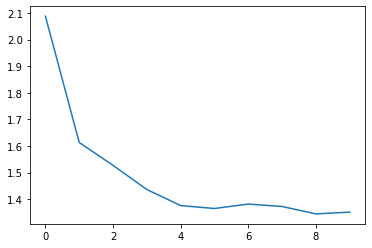

In [ ]:
import seaborn as sns
sns.lineplot(range(10), results.history['loss'])

In [ ]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 191), started 0:06:48 ago. (Use '!kill 191' to kill it.)

<IPython.core.display.Javascript object>

### Different Activation Functions

In [ ]:
logdir = os.path.join("logs", 'different-activation')
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation="relu"),
    Dense(128, activation="sigmoid"),
    Dense(10,  activation="softmax")
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x=X_train, 
        y=y_train, 
        epochs=15, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback])

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5399 - accuracy: 0.8593 - val_loss: 0.2941 - val_accuracy: 0.9222
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9280 - val_loss: 0.2209 - val_accuracy: 0.9361
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2069 - accuracy: 0.9399 - val_loss: 0.1940 - val_accuracy: 0.9445
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1736 - accuracy: 0.9493 - val_loss: 0.1686 - val_accuracy: 0.9495
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1519 - accuracy: 0.9558 - val_loss: 0.1638 - val_accuracy: 0.9503
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1366 - accuracy: 0.9608 - val_loss: 0.1471 - val_accuracy: 0.9564
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1230 - accuracy: 0.9642 - val_loss: 0.1388 - val_accuracy:

In [ ]:
%tensorboard --logdir logs

### Different Optimization Functions

In [ ]:
logdir = os.path.join("logs", 'different-optimization')
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128, activation="relu"),
    Dense(128, activation="sigmoid"),
    Dense(10,  activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x=X_train, 
        y=y_train, 
        epochs=10, 
        validation_data=(X_test, y_test), 
        callbacks=[tensorboard_callback])


#variety of optimizer 
#look at Keras documentation

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5743 - accuracy: 0.8507 - val_loss: 0.3043 - val_accuracy: 0.9174
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2691 - accuracy: 0.9247 - val_loss: 0.2270 - val_accuracy: 0.9339
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2088 - accuracy: 0.9401 - val_loss: 0.1839 - val_accuracy: 0.9469
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1739 - accuracy: 0.9500 - val_loss: 0.1735 - val_accuracy: 0.9474
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1552 - accuracy: 0.9546 - val_loss: 0.1549 - val_accuracy: 0.9574
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1371 - accuracy: 0.9599 - val_loss: 0.1405 - val_accuracy: 0.9584
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1244 - accuracy: 0.9644 - val_loss: 0.1383 - val_accuracy:

In [ ]:
%tensorboard --logdir logs

## Challenge

You will have to choose your own architectures in today's module project. In the next module, we will discuss hyperparameter optimization which can help you handle these numerous choices. 

---

# Activation Functions (Learn)

## Overview
What is an activation function and how does it work?

- Takes in a weighted sum of inputs + a bias from the previous layer and outputs an "activation" value.
- Based its inputs the neuron decides how 'activated' it should be. This can be thought of as the neuron deciding how strongly to fire. You can also think of it as if the neuron is deciding how much of the signal that it has received to pass onto the next layer. 
- Our choice of activation function does not only affect signal that is passed forward but also affects the backpropagation algorithm. It affects how we update weights in reverse order since activated weight/input sums become the inputs of the next layer. 

## Follow Along

### Step Function

![Heaviside Step Function](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Dirac_distribution_CDF.svg/2560px-Dirac_distribution_CDF.svg.png)

All or nothing, a little extreme, which is fine, but makes updating weights through backpropagation impossible. Why? remember that during backpropagation we use derivatives in order to determine how much to update or not update weights. What is the derivative of the step function?

### Linear Function

![Linear Function](http://www.roconnell.net/Parent%20function/linear.gif)

The linear function takes the opposite tact from the step function and passes the signal onto the next layer by a constant factor. There are problems with this but the biggest problems again lie in backpropagation. The derivative of any linear function is a horizontal line which would indicate that we should update all weights by a constant amount every time -which on balance wouldn't change the behavior of our network. Linear functions are typically only used for very simple tasks where interpretability is important, but if interpretability is your highest priority, you probably shouldn't be using neural networks in the first place.

### Sigmoid Function

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

The sigmoid function works great as an activation function! it's continuously differentiable, its derivative doesn't have a constant slope, and having the higher slope in the middle pushes y value predictions towards extremes which is particularly useful for binary classification problems. I mean, this is why we use it as the squishifier in logistic regression as well. It constrains output, but over repeated epochs pushes predictions towards a strong binary prediction. 

What's the biggest problem with the sigmoid function? The fact that its slope gets pretty flat so quickly after its departure from zero. This means that updating weights based on its gradient really diminishes the size of our weight updates as our model gets more confident about its classifications. This is why even after so many iterations with our test score example we couldn't reach the levels of fit that our gradient descent based model could reach in just a few epochs.

### Tanh Function

![Tanh Function](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)

What if the sigmoid function didn't get so flat quite as soon when moving away from zero and was a little bit steeper in the middle? That's basically the Tanh function. The Tanh function can actually be created by scaling the sigmoid function by 2 in the y dimension and subtracting 1 from all values. It has basically the same properties as the sigmoid, still struggles from diminishingly flat gradients as we move away from 0, but its derivative is higher around 0 causing weights to move to the extremes a little faster. 

### ReLU Function

![ReLU Function](https://cdn-images-1.medium.com/max/937/1*oePAhrm74RNnNEolprmTaQ.png)

ReLU stands for Rectified Linear Units it is by far the most commonly used activation function in modern neural networks. It doesn't activate neurons that are being passed a negative signal and passes on positive signals. Think about why this might be useful. Remember how a lot of our initial weights got set to negative numbers by chance? This would have dealt with those negative weights a lot faster than the sigmoid function updating. What does the derivative of this function look like? It looks like the step function! This means that not all neurons are activated. With sigmoid basically all of our neurons are passing some amount of signal even if it's small making it hard for the network to differentiate important and less important connections. ReLU turns off a portion of our less important neurons which decreases computational load, but also helps the network learn what the most important connections are faster. 

What's the problem with relu? Well the left half of its derivative function shows that for neurons that are initialized with weights that cause them to have no activation, our gradient will not update those neuron's weights, this can lead to dead neurons that never fire and whose weights never get updated. We would probably want to update the weights of neurons that didn't fire even if it's just by a little bit in case we got unlucky with our initial weights and want to give those neurons a chance of turning back on in the future.

### Leaky ReLU

![Leaky ReLU](https://cdn-images-1.medium.com/max/1600/1*ypsvQH7kvtI2BhzR2eT_Sw.png)

Leaky ReLU accomplishes exactly that! it avoids having a gradient of 0 on the left side of its derivative function. This means that even "dead" neurons have a chance of being revived over enough iterations. In some specifications the slope of the leaky left-hand side can also be experimented with as a hyperparameter of the model!

### Softmax Function

![Softmax Function](https://cdn-images-1.medium.com/max/800/1*670CdxchunD-yAuUWdI7Bw.png)

Like the sigmoid function but more useful for multi-class classification problems. The softmax function can take any set of inputs and translate them into probabilities that sum up to 1. This means that we can throw any list of outputs at it and it will translate them into probabilities, this is extremely useful for multi-class classification problems. Like MNIST for example...

### Major takeaways

- ReLU is generally better at obtaining the optimal model fit.
- Sigmoid and its derivatives are usually better at classification problems.
- Softmax for multi-class classification problems. 

You'll typically see ReLU used for all initial layers and then the final layer being sigmoid or softmax for classification problems. But you can experiment and tune these selections as hyperparameters as well!

## Challenge

You will apply your choice of activation function inside two Keras Seqeuntial models today. 

---

# Regularization Strategies (Learn)

## Overview

Neural Networks are highly parameterized models and can be easily overfit to the training data. The most salient way to combat this problem is with regularization strategies.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/1920px-Regularization.svg.png)

There are four common ways of regularization in neural networks which we cover briefly. Here's a quick summary of how to apply them: 

1. Always use EarlyStopping. This strategy will prevent your weights from being updated well past the point of their peak usefulness.
2. Use EarlyStopping, Weight Decay and Dropout
3. Use EarlyStopping, Weight Constraint and Dropout

Weight Decay and Weigh Constraint accomplish similar purposes - preventing over fitting the parameters by regularizing the values. The mechanics are just slightly different. That's why you would not necessary want to apply them together.

## Follow Along

### Early Stopping

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
#Catch when optimization isn't increasing and this saves watching


logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0045 - accuracy: 0.8786 - val_loss: 0.2760 - val_accuracy: 0.9306
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2167 - accuracy: 0.9414 - val_loss: 0.1751 - val_accuracy: 0.9508
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1604 - accuracy: 0.9544 - val_loss: 0.1927 - val_accuracy: 0.9452
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1352 - accuracy: 0.9611 - val_loss: 0.1598 - val_accuracy: 0.9571
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1154 - accuracy: 0.9656 - val_loss: 0.1692 - val_accuracy: 0.9580


### Weight Decay

```python
Dense(64, input_dim=64,
            kernel_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l1(0.01)))
```

In [36]:
from tensorflow.keras import regularizers

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])



Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 3.7653 - accuracy: 0.8842 - val_loss: 1.9818 - val_accuracy: 0.9359
Epoch 2/50
1875/1875 [==============================] - 12s 7ms/step - loss: 1.2486 - accuracy: 0.9471 - val_loss: 0.7256 - val_accuracy: 0.9537
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5189 - accuracy: 0.9503 - val_loss: 0.3940 - val_accuracy: 0.9512
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3488 - accuracy: 0.9526 - val_loss: 0.3174 - val_accuracy: 0.9536
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3186 - accuracy: 0.9513 - val_loss: 0.3128 - val_accuracy: 0.9493


### Weight Constraint

```python
tf.keras.constraints.MaxNorm(
    max_value=2, axis=0
)
```

In [ ]:
from tensorflow.keras.constraints import MaxNorm

model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu', kernel_constraint=tf.keras.constraints.MaxNorm(max_value=2, axis=0),
    Dense(128, activation='relu', kernel_constraint=...,
    Dense(128, activation='relu', kernel_constraint=...,
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])


### Dropout

In [37]:
from tensorflow.keras.layers import Dropout


model = Sequential([
    Flatten(),
    Dense(128, input_dim=784, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])


Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 4.2262 - accuracy: 0.8194 - val_loss: 2.0569 - val_accuracy: 0.9274
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 1.3461 - accuracy: 0.9231 - val_loss: 0.7053 - val_accuracy: 0.9499
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5689 - accuracy: 0.9334 - val_loss: 0.4159 - val_accuracy: 0.9452
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4473 - accuracy: 0.9337 - val_loss: 0.3851 - val_accuracy: 0.9479
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4369 - accuracy: 0.9334 - val_loss: 0.3471 - val_accuracy: 0.9567


In [ ]:
%tensorboard --logdir logs

## Challenge

You will apply regularization strategies inside your neural network today, as you try to avoid overfitting it. 

---